# Making an Income Prediction

In this project for OpenClassrooms, a bank is looking to target new potential customers who are more likely to have higher incomes later in life. The goal of the project is to create a model to predict a person's future income. 

## Task 1

In Task 1, OpenClassrooms is looking for a research paper from the World Bank to be read. The paper outlines a model that can predict an individual's income from the variables country of residence and parent income. 

The project leader is looking for a short preliminary analysis containing the:

* Year(s) of data.

* Number of countries involved.

* Population covered by the dataset (percentage of world population).

* The type of quantiles used (quartiles, deciles, ventiles, percentiles, etc.).

* The dollar PPP unity and an explanation of why (not why not) it’s a good method to compare countries.

* A graph showing how diverse countries are in terms of income distribution. This graph must represent the income (y-axis, on a log scale) as a function of income class (x-axis) for 5 to 10 countries. Please ensure you represent a diversity of cases. Among the countries that must be present : your own country, and the two countries that have the greatest and lowest Gini index.

* The Lorenz curve for these countries.

# Exploring the data 

In [6]:
from urllib import request
import pandas as pd
from pandas import DataFrame
from itertools import chain, combinations
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import scipy.stats as st
from scipy.stats import chi2_contingency
import random
from datetime import datetime, timedelta
sns.set()
%matplotlib inline

## Importing the data

In [7]:
income = pd.read_csv('world_income_distribution_2008.csv')
income
# Each quantile is an income class

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,"728,89795",7297
1,ALB,2008,2,100,"916,66235",7297
2,ALB,2008,3,100,"1010,916",7297
3,ALB,2008,4,100,"1086,9078",7297
4,ALB,2008,5,100,"1132,6997",7297
...,...,...,...,...,...,...
11594,COD,2008,96,100,"810,6233","303,19305"
11595,COD,2008,97,100,"911,7834","303,19305"
11596,COD,2008,98,100,"1057,8074","303,19305"
11597,COD,2008,99,100,"1286,6029","303,19305"


In [8]:
gini = pd.read_csv('gini_final.csv')
gini.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,"[""Aruba""",ABW,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,],NaN
1,"[""Afghanistan""",AFG,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,],NaN
2,"[""Angola""",AGO,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3,],NaN
3,"[""Albania""",ALB,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29.0,NaN,34.6,32.9,33.7,33.2,NaN,],NaN
4,"[""Andorra""",AND,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,],NaN


In [9]:
population = pd.read_csv('population_new.csv')
population

,"[""Country Name""",Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
0,"[""Aruba""",ABW,"Population, total",SP.POP.TOTL,54211,55438.0,56225.0,56695.0,57032.0,57360.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314]
1,"[""Afghanistan""",AFG,"Population, total",SP.POP.TOTL,8996973,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754]
2,"[""Angola""",AGO,"Population, total",SP.POP.TOTL,5454933,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295]
3,"[""Albania""",ALB,"Population, total",SP.POP.TOTL,1608800,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191]
4,"[""Andorra""",AND,"Population, total",SP.POP.TOTL,13411,14375.0,15370.0,16412.0,17469.0,18549.0,...,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,"[""Kosovo""",XKX,"Population, total",SP.POP.TOTL,947000,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1775680.0,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1794248]
260,"[""Yemen","Rep.""",YEM,"Population, total",SP.POP.TOTL,5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,...,22516460.0,23154855.0,23807588.0,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687]
261,"[""South Africa""",ZAF,"Population, total",SP.POP.TOTL,17099840,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,...,51216964.0,52004172.0,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,58558270]
262,"[""Zambia""",ZMB,"Population, total",SP.POP.TOTL,3070776,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,...,13605984.0,14023193.0,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,17861030]


## Exploring the data

### Exploring dataframe income

In [10]:
income.columns

Index(['country', 'year_survey', 'quantile', 'nb_quantiles', 'income',
       'gdpppp'],
      dtype='object')

In [11]:
income.shape

(11599, 6)

In [12]:
income.dtypes

country         object
year_survey      int64
quantile         int64
nb_quantiles     int64
income          object
gdpppp          object
dtype: object

In [13]:
income.describe()
# The number of quantiles appears to be 100

,year_survey,quantile,nb_quantiles
count,11599.000000,11599.000000,11599.0
mean,2007.982757,50.500819,100.0
std,0.909633,28.868424,0.0
min,2004.000000,1.000000,100.0
25%,2008.000000,25.500000,100.0
50%,2008.000000,51.000000,100.0
75%,2008.000000,75.500000,100.0
max,2011.000000,100.000000,100.0


In [14]:
income.isnull().sum()

country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp          200
dtype: int64

In [15]:
income['quantile'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [16]:
income['nb_quantiles'].unique()

array([100])

In [17]:
income['country'].unique()

array(['ALB', 'ARG', 'ARM', 'AUT', 'AZE', 'BEL', 'BFA', 'BGD', 'BGR',
       'BIH', 'BLR', 'BOL', 'BRA', 'BTN', 'CAF', 'CAN', 'CHL', 'CHN',
       'CIV', 'CMR', 'COL', 'CRI', 'CYP', 'CZE', 'DEU', 'DNK', 'DOM',
       'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FJI', 'FRA', 'GBR', 'GEO',
       'GHA', 'GIN', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IND',
       'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JOR', 'JPN', 'KAZ',
       'KEN', 'KGZ', 'KHM', 'KOR', 'XKX', 'LAO', 'LBR', 'LKA', 'LTU',
       'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MNE',
       'MNG', 'MOZ', 'MRT', 'MWI', 'MYS', 'NER', 'NGA', 'NIC', 'NLD',
       'NOR', 'NPL', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY',
       'ROU', 'RUS', 'SDN', 'SLV', 'SRB', 'SVK', 'SVN', 'SWE', 'SWZ',
       'SYR', 'THA', 'TJK', 'TLS', 'TUR', 'TWN', 'TZA', 'UGA', 'UKR',
       'URY', 'USA', 'VEN', 'VNM', 'PSE', 'YEM', 'ZAF', 'COD'],
      dtype=object)

### Exploring dataframe gini

In [18]:
gini.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')

In [19]:
gini.shape

(264, 65)

In [20]:
gini.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960               object
                   ...   
2016              float64
2017              float64
2018              float64
2019               object
Unnamed: 64        object
Length: 65, dtype: object

In [21]:
gini.describe()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,78.000000,81.000000,78.000000,77.000000,77.000000,80.000000,79.000000,78.000000,65.000000,30.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,33.7,NaN,...,37.376923,36.653086,36.002564,36.706494,36.383117,36.673750,36.878481,36.307692,36.224615,39.900000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.763441,8.198340,7.754546,7.669031,7.400949,8.106924,7.967879,7.519304,7.641826,7.987663
min,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,33.7,NaN,...,24.800000,24.800000,24.600000,24.700000,24.600000,24.000000,25.400000,24.800000,24.200000,25.200000
25%,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,33.7,NaN,...,31.125000,30.500000,30.275000,29.600000,30.700000,31.125000,31.400000,31.200000,29.700000,35.700000
50%,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,33.7,NaN,...,34.900000,34.400000,33.950000,36.000000,36.200000,35.150000,35.900000,35.100000,35.900000,40.250000
75%,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,33.7,NaN,...,44.050000,42.000000,42.250000,41.300000,41.000000,40.900000,41.250000,41.200000,41.200000,45.400000
max,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,33.7,NaN,...,61.000000,63.400000,56.200000,56.100000,52.800000,63.000000,59.100000,54.600000,56.300000,53.900000


In [22]:
gini.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              251
                 ... 
2016              186
2017              199
2018              234
2019               13
Unnamed: 64       251
Length: 65, dtype: int64

### Exploring dataframe population

In [23]:
population.columns

Index(['["Country Name"', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019]'],
      dtype='object')

In [24]:
population.shape

(264, 64)

In [25]:
population.dtypes

["Country Name"     object
Country Code        object
Indicator Name      object
Indicator Code      object
1960                object
                    ...   
2015               float64
2016               float64
2017               float64
2018               float64
2019]               object
Length: 64, dtype: object

In [26]:
population.describe()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02,...,2.630000e+02,2.630000e+02,2.630000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02
mean,1.195083e+08,1.216269e+08,1.242638e+08,1.269213e+08,1.296441e+08,1.325109e+08,1.353668e+08,1.382759e+08,1.413296e+08,1.444270e+08,...,2.741597e+08,2.776715e+08,2.811688e+08,2.858136e+08,2.894483e+08,2.931166e+08,2.967998e+08,3.005140e+08,3.042246e+08,3.078698e+08
std,3.772312e+08,3.838019e+08,3.923689e+08,4.009789e+08,4.098255e+08,4.192368e+08,4.285786e+08,4.381354e+08,4.481840e+08,4.584292e+08,...,8.719860e+08,8.824931e+08,8.930311e+08,9.052682e+08,9.160887e+08,9.269869e+08,9.379110e+08,9.489178e+08,9.599249e+08,9.706714e+08
min,3.989000e+03,4.076000e+03,4.183000e+03,4.308000e+03,4.468000e+03,4.685000e+03,4.920000e+03,5.193000e+03,5.459000e+03,5.712000e+03,...,9.939000e+03,1.000500e+04,1.005700e+04,1.027900e+04,1.082100e+04,1.097200e+04,1.109900e+04,1.122500e+04,1.137000e+04,1.150800e+04
25%,5.109635e+05,5.206552e+05,5.311588e+05,5.421285e+05,5.533358e+05,5.647510e+05,5.823600e+05,5.981080e+05,6.100040e+05,6.241908e+05,...,1.409218e+06,1.427037e+06,1.449584e+06,1.409858e+06,1.427339e+06,1.444866e+06,1.463189e+06,1.513732e+06,1.568306e+06,1.626350e+06
50%,3.738358e+06,3.821016e+06,3.926268e+06,4.051891e+06,4.180652e+06,4.275565e+06,4.344568e+06,4.415026e+06,4.455048e+06,4.524434e+06,...,9.142259e+06,9.378126e+06,9.460830e+06,9.624311e+06,9.746730e+06,9.855382e+06,1.000153e+07,1.012427e+07,1.017900e+07,1.022952e+07
75%,2.541750e+07,2.616581e+07,2.691284e+07,2.766416e+07,2.839934e+07,2.913676e+07,2.988608e+07,3.061236e+07,3.126580e+07,3.182427e+07,...,5.036369e+07,5.090889e+07,5.149739e+07,5.247893e+07,5.323004e+07,5.397970e+07,5.470996e+07,5.541544e+07,5.641631e+07,5.741430e+07
max,3.072481e+09,3.125457e+09,3.190564e+09,3.256065e+09,3.322973e+09,3.393032e+09,3.462460e+09,3.532827e+09,3.607500e+09,3.682911e+09,...,6.839574e+09,6.921872e+09,7.002861e+09,7.085763e+09,7.169640e+09,7.254228e+09,7.338965e+09,7.424282e+09,7.509066e+09,7.591933e+09


In [27]:
population.isnull().sum()

["Country Name"    0
Country Code       0
Indicator Name     0
Indicator Code     0
1960               4
                  ..
2015               2
2016               2
2017               2
2018               2
2019]              0
Length: 64, dtype: int64

## Cleaning the dataframes 

### Cleaning the dataframe income

In [28]:
income.dtypes

country         object
year_survey      int64
quantile         int64
nb_quantiles     int64
income          object
gdpppp          object
dtype: object

In [29]:
income.isnull().sum()

# likely means the gdp is missing for two countries 
# can find which countries they are and impute the closest number

country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp          200
dtype: int64

In [30]:
income['gdpppp'] = pd.to_numeric(income['gdpppp'].str.replace(',', ''))

In [31]:
income['income'] = pd.to_numeric(income['income'].str.replace(',', '.'))

In [32]:
income.dtypes

country          object
year_survey       int64
quantile          int64
nb_quantiles      int64
income          float64
gdpppp          float64
dtype: object

In [33]:
nan_gdp = income[income.isna().any(axis=1)]

In [34]:
nan_gdp['country'].unique()
# The two countries are XKX and PSE
# XKX = Kosovo
# Palestinian Territory
# 

array(['XKX', 'PSE'], dtype=object)

In [35]:
income['gdpppp'].fillna((income['gdpppp'].median()), inplace=True)

In [36]:
income.isnull().sum()

country         0
year_survey     0
quantile        0
nb_quantiles    0
income          0
gdpppp          0
dtype: int64

Text(0.5, 1.0, 'Product Prices')

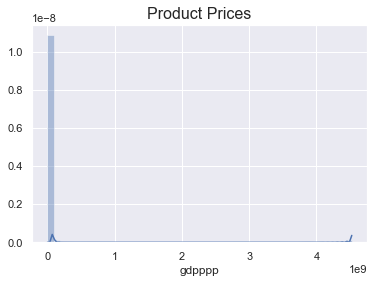

In [37]:
sns.distplot(income.gdpppp)
plt.title('Product Prices', fontsize = 16)

# Some countries'gdp is much higher than others. 
# This is to be expected due to population/resource differences.

In [38]:
income

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0
3,ALB,2008,4,100,1086.90780,7297.0
4,ALB,2008,5,100,1132.69970,7297.0
...,...,...,...,...,...,...
11594,COD,2008,96,100,810.62330,30319305.0
11595,COD,2008,97,100,911.78340,30319305.0
11596,COD,2008,98,100,1057.80740,30319305.0
11597,COD,2008,99,100,1286.60290,30319305.0


### Cleaning the dataframe populations

In [39]:
population.columns

Index(['["Country Name"', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019]'],
      dtype='object')

In [40]:
# reducing to only 2008
year = population.drop(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019]'], axis=1)

In [41]:
year.shape

(264, 5)

In [42]:
# There is one row with missing information
year.isnull().sum()

["Country Name"    0
Country Code       0
Indicator Name     0
Indicator Code     0
2008               1
dtype: int64

In [43]:
which = year[year.isna().any(axis=1)]

In [44]:
which

,"[""Country Name""",Country Code,Indicator Name,Indicator Code,2008
108,"[""Not classified""",INX,"Population, total",SP.POP.TOTL,NaN


In [45]:
inx = population[population['Country Code'] == 'INX']

In [46]:
inx
# inx is an abbreviation for information exchange. 
# This row can be filled with the median as it likely won't be important later on

,"[""Country Name""",Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
108,"[""Not classified""",INX,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,]


In [47]:
year['2008'].fillna((year['2008'].median()), inplace=True)

In [48]:
year.shape

(264, 5)

In [49]:
year.isnull().sum()

["Country Name"    0
Country Code       0
Indicator Name     0
Indicator Code     0
2008               0
dtype: int64

In [50]:
# taking off the quotes and brackets from the country name column
year['["Country Name"'] = year['["Country Name"'].str.replace('"', '')

In [51]:
year['["Country Name"'] = year['["Country Name"'].str.replace('[', '')

In [52]:
year = year.rename({('["Country Name"'): 'Country Name'}, axis=1)

### Cleaning the dataframe gini

In [53]:
gini.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')

In [54]:
gini.shape

(264, 65)

In [55]:
gini['2008'].unique()

array([ nan, 42.7, 30. , 45.3, 29.2, 35.4, 30.4, 28.4, 33.6, 27.8, 50.8,
       54. , 56.2, 33.8, 43. , 43.2, 55.5, 48.7, 31.7, 26.3, 31.1, 25.2,
       48.1, 49.7, 34.2, 31.9, 40.4, 33. , 34.1, 38.5, 27.5, 36.8, 30.9,
       31.8, 32.6, 34.8, 28.5, 31.5, 35.7, 37.2, 34.7, 49.9, 29. , 45.6,
       45.5, 29.3, 27. , 52.7, 47.5, 33.5, 36.6, 50.7, 36.4, 41.6, 46.9,
       26. , 23.7, 28.1, 40.3, 39. , 26.6, 45.1, 35.6, 42. , 63. ])

In [56]:
gini_two = gini.drop(['2019', 'Unnamed: 64'], axis=1)

In [57]:
gini_two.shape

(264, 63)

In [58]:
# first countries' missing information with its most recent gini index
gini_two.fillna(axis=1, method='backfill')

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"[""Aruba""",ABW,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[""Afghanistan""",AFG,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[""Angola""",AGO,GINI index (World Bank estimate),SI.POV.GINI,52,52,52,52,52,52,...,51.3,51.3,51.3,51.3,51.3,51.3,51.3,51.3,51.3,51.3
3,"[""Albania""",ALB,GINI index (World Bank estimate),SI.POV.GINI,27,27,27,27,27,27,...,29,29,29,29,34.6,34.6,32.9,33.7,33.2,NaN
4,"[""Andorra""",AND,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,"[""Kosovo""",XKX,GINI index (World Bank estimate),SI.POV.GINI,29,29,29,29,29,29,...,31.8,33.3,27.8,29,26.3,27.3,26.5,26.7,29,NaN
260,"[""Yemen","Rep.""",YEM,GINI index (World Bank estimate),SI.POV.GINI,35,35,35,35,35,...,36.7,36.7,36.7,36.7,36.7,36.7,36.7,NaN,NaN,NaN
261,"[""South Africa""",ZAF,GINI index (World Bank estimate),SI.POV.GINI,59.3,59.3,59.3,59.3,59.3,59.3,...,63.4,63.4,63,63,63,63,NaN,NaN,NaN,NaN
262,"[""Zambia""",ZMB,GINI index (World Bank estimate),SI.POV.GINI,60.5,60.5,60.5,60.5,60.5,60.5,...,55.6,55.6,57.1,57.1,57.1,57.1,57.1,NaN,NaN,NaN


In [59]:
cols = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018']
gini_two.loc[:,cols] = gini_two.loc[:,cols].ffill()

In [60]:
gini_two

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"[""Aruba""",ABW,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[""Afghanistan""",AFG,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[""Angola""",AGO,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.3
3,"[""Albania""",ALB,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,29.0,NaN,34.6,32.9,33.7,33.2,51.3
4,"[""Andorra""",AND,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,29.0,NaN,34.6,32.9,33.7,33.2,51.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,"[""Kosovo""",XKX,GINI index (World Bank estimate),SI.POV.GINI,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,...,31.8,33.3,27.8,29.0,26.3,27.3,26.5,26.7,29.0,35.7
260,"[""Yemen","Rep.""",YEM,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,...,31.8,33.3,27.8,29.0,26.3,27.3,36.7,26.7,29.0,35.7
261,"[""South Africa""",ZAF,GINI index (World Bank estimate),SI.POV.GINI,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,...,31.8,63.4,27.8,29.0,26.3,63.0,36.7,26.7,29.0,35.7
262,"[""Zambia""",ZMB,GINI index (World Bank estimate),SI.POV.GINI,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,...,31.8,55.6,27.8,29.0,26.3,63.0,57.1,26.7,29.0,35.7


In [61]:
gini_two['2008'].describe()

count    262.000000
mean      38.248092
std        8.822150
min       23.700000
25%       31.500000
50%       35.700000
75%       45.500000
max       63.000000
Name: 2008, dtype: float64

In [62]:
gini_two['2008'].isnull().sum()
# There are only nans, so I feel comfortable filling them with the median

2

In [63]:
gini_two['2008'].fillna((gini_two['2008'].median()), inplace=True)

In [64]:
gini_two['2008'].isnull().sum()

0

In [65]:
# dropping all other rows except 2008
gini_final = gini_two.drop(['Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'], axis=1)

In [66]:
gini_final

,Country Name,Country Code,2008
0,"[""Aruba""",ABW,35.7
1,"[""Afghanistan""",AFG,35.7
2,"[""Angola""",AGO,42.7
3,"[""Albania""",ALB,30.0
4,"[""Andorra""",AND,30.0
...,...,...,...
259,"[""Kosovo""",XKX,42.0
260,"[""Yemen","Rep.""",42.0
261,"[""South Africa""",ZAF,63.0
262,"[""Zambia""",ZMB,63.0


In [67]:
# taking off the quotes and brackets from the country name column
gini_final['Country Name'] = gini_final['Country Name'].str.replace('"', '')

In [68]:
gini_final['Country Name'] = gini_final['Country Name'].str.replace('[', '')

In [69]:
gini_final

,Country Name,Country Code,2008
0,Aruba,ABW,35.7
1,Afghanistan,AFG,35.7
2,Angola,AGO,42.7
3,Albania,ALB,30.0
4,Andorra,AND,30.0
...,...,...,...
259,Kosovo,XKX,42.0
260,Yemen,"Rep.""",42.0
261,South Africa,ZAF,63.0
262,Zambia,ZMB,63.0


## Merging Gini and year

In [70]:
gini_third = gini_final.rename({'Country Code': 'country'}, axis=1)

In [71]:
second_year = year.rename({'Country Code': 'country'}, axis=1)

In [72]:
gini_year = pd.merge(second_year, gini_third, on='country', how='inner')
gini_year

,Country Name_x,country,Indicator Name,Indicator Code,2008_x,Country Name_y,2008_y
0,Aruba,ABW,"Population, total",SP.POP.TOTL,101358.0,Aruba,35.7
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,27722276.0,Afghanistan,35.7
2,Angola,AGO,"Population, total",SP.POP.TOTL,21695634.0,Angola,42.7
3,Albania,ALB,"Population, total",SP.POP.TOTL,2947314.0,Albania,30.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,83862.0,Andorra,30.0
...,...,...,...,...,...,...,...
269,Samoa,WSM,"Population, total",SP.POP.TOTL,183263.0,Samoa,42.0
270,Kosovo,XKX,"Population, total",SP.POP.TOTL,1747383.0,Kosovo,42.0
271,South Africa,ZAF,"Population, total",SP.POP.TOTL,49779471.0,South Africa,63.0
272,Zambia,ZMB,"Population, total",SP.POP.TOTL,12848530.0,Zambia,63.0


In [73]:
gini_year.isnull().sum()

Country Name_x    0
country           0
Indicator Name    0
Indicator Code    0
2008_x            0
Country Name_y    0
2008_y            0
dtype: int64

In [74]:
gini_second = gini_year.rename({('Country Name_x'): 'Country Name'}, axis=1)

In [75]:
gini_third = gini_second.rename({('2008_x'): 'Total_Population'}, axis=1)

In [76]:
gini_fourth = gini_third.rename({('2008_y'): 'Gini Index'}, axis=1)

In [77]:
gini_fifth = gini_fourth.drop(['Country Name_y', 'Indicator Name', 'Indicator Code'], axis=1)

In [78]:
gini_fifth.shape

(274, 4)

In [79]:
gini_fifth

# In order to predict income, these explanatory variables are needed
# country
# average income in the country
# gini index of the country
# the individual parents income class 

,Country Name,country,Total_Population,Gini Index
0,Aruba,ABW,101358.0,35.7
1,Afghanistan,AFG,27722276.0,35.7
2,Angola,AGO,21695634.0,42.7
3,Albania,ALB,2947314.0,30.0
4,Andorra,AND,83862.0,30.0
...,...,...,...,...
269,Samoa,WSM,183263.0,42.0
270,Kosovo,XKX,1747383.0,42.0
271,South Africa,ZAF,49779471.0,63.0
272,Zambia,ZMB,12848530.0,63.0


## Making a master dataset

In [80]:
country_one = gini_fifth['country']

In [81]:
country_two = income['country']

In [82]:
country_check = pd.merge(country_one, country_two, on='country', how='right')
country_check
# appears to be ok as a foreign key

,country
0,ALB
1,ALB
2,ALB
3,ALB
4,ALB
...,...
11594,COD
11595,COD
11596,COD
11597,COD


In [83]:
master = pd.merge(gini_fifth, income, on='country', how='right')
master

,Country Name,country,Total_Population,Gini Index,year_survey,quantile,nb_quantiles,income,gdpppp
0,Albania,ALB,2947314.0,30.0,2008,1,100,728.89795,7297.0
1,Albania,ALB,2947314.0,30.0,2008,2,100,916.66235,7297.0
2,Albania,ALB,2947314.0,30.0,2008,3,100,1010.91600,7297.0
3,Albania,ALB,2947314.0,30.0,2008,4,100,1086.90780,7297.0
4,Albania,ALB,2947314.0,30.0,2008,5,100,1132.69970,7297.0
...,...,...,...,...,...,...,...,...,...
11594,NaN,COD,NaN,NaN,2008,96,100,810.62330,30319305.0
11595,NaN,COD,NaN,NaN,2008,97,100,911.78340,30319305.0
11596,NaN,COD,NaN,NaN,2008,98,100,1057.80740,30319305.0
11597,NaN,COD,NaN,NaN,2008,99,100,1286.60290,30319305.0


## Cleaning master dataset

In [84]:
master.isnull().sum()
# 7 countries are missing -- I'm going to check which ones are 

Country Name        700
country               0
Total_Population    700
Gini Index          700
year_survey           0
quantile              0
nb_quantiles          0
income                0
gdpppp                0
dtype: int64

In [85]:
seven = master[master.isna().any(axis=1)]

In [86]:
seven.country.unique()
# EGY --> Egypt
# IRN --> Iran
# KOR --> South Korea
# TWN --> Taiwan
# VEN --> Venezuela
# YEM --> Yemen
# COD --> Democratic Republic of the Congo

array(['EGY', 'IRN', 'KOR', 'TWN', 'VEN', 'YEM', 'COD'], dtype=object)

Filling the missing 7 countries info with google search numbers. 
Egypt in 2008:

* Population was 79,640,000

* Gini Index was 30.2

Iran in 2008:

* Population was 72,120,000

* Gini Index was 42

South Korea in 2008:

* Population was 49,050,000

* Gini Index was 32.3

Tawian in 2008:

* Population was 23,037,000

* Gini Index was 34.1

Venezuela: 

* Population was 27,640,000 in __2008__

* Gini Index was 46.9 in __2006__

Yemen in 2008: 

* Population was 21,890,000

* Gini Index was 35

Democratic Republic of the Congo in 2008:

* Population was 60,410,000

* Gini Index was 42.15


#### Filling nans in populations

In [87]:
master.loc[(master['Total_Population'].isnull()) & (master.country == 'EGY'), 'Total_Population']= '79640000'

In [88]:
master.loc[(master['Total_Population'].isnull()) & (master.country == 'IRN'), 'Total_Population']= '72120000'

In [89]:
master.loc[(master['Total_Population'].isnull()) & (master.country == 'KOR'), 'Total_Population']= '49050000'

In [90]:
master.loc[(master['Total_Population'].isnull()) & (master.country == 'TWN'), 'Total_Population']= '23037000'

In [91]:
master.loc[(master['Total_Population'].isnull()) & (master.country == 'VEN'), 'Total_Population']= '27640000'

In [92]:
master.loc[(master['Total_Population'].isnull()) & (master.country == 'YEM'), 'Total_Population']= '21890000'

In [93]:
master.loc[(master['Total_Population'].isnull()) & (master.country == 'COD'), 'Total_Population']= '60410000'

#### Filling nans in Gini Index

In [94]:
master.loc[(master['Gini Index'].isnull()) & (master.country == 'EGY'), 'Gini Index']= '30.2'

In [95]:
master.loc[(master['Gini Index'].isnull()) & (master.country == 'IRN'), 'Gini Index']= '42'

In [96]:
master.loc[(master['Gini Index'].isnull()) & (master.country == 'KOR'), 'Gini Index']= '32.3'

In [97]:
master.loc[(master['Gini Index'].isnull()) & (master.country == 'TWN'), 'Gini Index']= '34.1'

In [98]:
master.loc[(master['Gini Index'].isnull()) & (master.country == 'VEN'), 'Gini Index']= '46.9'

In [99]:
master.loc[(master['Gini Index'].isnull()) & (master.country == 'YEM'), 'Gini Index']= '35'

In [100]:
master.loc[(master['Gini Index'].isnull()) & (master.country == 'COD'), 'Gini Index']= '42.15'

#### Filling country names

In [101]:
master.loc[(master['Country Name'].isnull()) & (master.country == 'EGY'), 'Country Name']= 'Egypt'

In [102]:
master.loc[(master['Country Name'].isnull()) & (master.country == 'IRN'), 'Country Name']= 'Iran'

In [103]:
master.loc[(master['Country Name'].isnull()) & (master.country == 'KOR'), 'Country Name']= 'South Korea'

In [104]:
master.loc[(master['Country Name'].isnull()) & (master.country == 'TWN'), 'Country Name']= 'Taiwan'

In [105]:
master.loc[(master['Country Name'].isnull()) & (master.country == 'VEN'), 'Country Name']= 'Venezuela'

In [106]:
master.loc[(master['Country Name'].isnull()) & (master.country == 'YEM'), 'Country Name']= 'Yemen'

In [107]:
master.loc[(master['Country Name'].isnull()) & (master.country == 'COD'), 'Country Name']= 'Democratic Republic of the Congo'

In [108]:
master.isnull().sum()

Country Name        0
country             0
Total_Population    0
Gini Index          0
year_survey         0
quantile            0
nb_quantiles        0
income              0
gdpppp              0
dtype: int64

In [109]:
number = master['Country Name'].unique()

In [110]:
number_rows = len(number)

In [111]:
# There are 116 countries 
number_rows

116

In [112]:
master

,Country Name,country,Total_Population,Gini Index,year_survey,quantile,nb_quantiles,income,gdpppp
0,Albania,ALB,2.94731e+06,30,2008,1,100,728.89795,7297.0
1,Albania,ALB,2.94731e+06,30,2008,2,100,916.66235,7297.0
2,Albania,ALB,2.94731e+06,30,2008,3,100,1010.91600,7297.0
3,Albania,ALB,2.94731e+06,30,2008,4,100,1086.90780,7297.0
4,Albania,ALB,2.94731e+06,30,2008,5,100,1132.69970,7297.0
...,...,...,...,...,...,...,...,...,...
11594,Democratic Republic of the Congo,COD,60410000,42.15,2008,96,100,810.62330,30319305.0
11595,Democratic Republic of the Congo,COD,60410000,42.15,2008,97,100,911.78340,30319305.0
11596,Democratic Republic of the Congo,COD,60410000,42.15,2008,98,100,1057.80740,30319305.0
11597,Democratic Republic of the Congo,COD,60410000,42.15,2008,99,100,1286.60290,30319305.0


In [113]:
master.to_csv(r'/Users/larabockenstedt/Making_an_Income_Prediction/master.csv')

In [114]:
# master['Total_Population'] = master['Total_Population'].str.replace(',', '')

In [115]:
master.dtypes

Country Name         object
country              object
Total_Population     object
Gini Index           object
year_survey           int64
quantile              int64
nb_quantiles          int64
income              float64
gdpppp              float64
dtype: object

In [116]:
master['Total_Population'] = master['Total_Population'].astype(int)

## Constructing the dataset

## Mark's notes

The research papers written by B. Milanovic included 

* Global inequality of opportunity: How much of our income is determined at birth?
https://stonecenter.gc.cuny.edu/files/2015/05/milanovic-global-inequality-of-opportunity-how-much-of-our-income-is-determined-by-where-we-live-2015.pdf

* Global inequality of opportunity: How much of our income is determined by where we live?
http://documents1.worldbank.org/curated/en/712251468165866186/pdf/946720JRN0Box30LIC00190rest0a000432.pdf

Mark said, "According to the research papers, in order to predict the income c_{i,child}, the dataset must contain at least these explanatory variables":

* country (j)

* mj : the average income in country j

* Gj : Gini index of country j

* the individual parents income class ci,parent

Note : The individual parent’s income class ci,parent needs to be simulated: see
instructions below.

In [117]:
master
# The master has average incomes by class
# income class
# the gini index of every country
# the total population

,Country Name,country,Total_Population,Gini Index,year_survey,quantile,nb_quantiles,income,gdpppp
0,Albania,ALB,2947314,30,2008,1,100,728.89795,7297.0
1,Albania,ALB,2947314,30,2008,2,100,916.66235,7297.0
2,Albania,ALB,2947314,30,2008,3,100,1010.91600,7297.0
3,Albania,ALB,2947314,30,2008,4,100,1086.90780,7297.0
4,Albania,ALB,2947314,30,2008,5,100,1132.69970,7297.0
...,...,...,...,...,...,...,...,...,...
11594,Democratic Republic of the Congo,COD,60410000,42.15,2008,96,100,810.62330,30319305.0
11595,Democratic Republic of the Congo,COD,60410000,42.15,2008,97,100,911.78340,30319305.0
11596,Democratic Republic of the Congo,COD,60410000,42.15,2008,98,100,1057.80740,30319305.0
11597,Democratic Republic of the Congo,COD,60410000,42.15,2008,99,100,1286.60290,30319305.0


# Task 1

The first brief with your manager Mark goes like this:

Mark: "Last year I read a research paper from the World Bank. The author claims to have found a model that can predict someone’s income from only a few variables: country of residence and parent income. Sounds crazy, I know, but I would like to test his model to see if we could apply it to our data. In our database, we already have our client’s country of residence. If we could predict their children's’ future income, we could target them very efficiently!"

With so little data available, it sounds like a challenging task, you think.

Mark: "I have already experimented with this idea in the past and implemented some code, but haven't had time to go any further. Here are some of my notes. As you can see, I provided information about the dataset that the research is based on. Basically it's from the World Income Distribution and provides income distribution quantiles of each country's population."

Mark: "For this first task, I need you to get familiar with this dataset and write a short preliminary analysis containing at least the following information:

* Year(s) of data.

* Number of countries involved.

* Population covered by the dataset (percentage of world population).

* The type of quantiles used (quartiles, deciles, ventiles, percentiles, etc.).

* The dollar PPP unit and an explanation of why (not why not) it’s a good method to compare countries.

* A graph showing how diverse countries are in terms of income distribution. This graph must represent the income (y-axis, on a log scale) as a function of income class (x-axis) for 5 to 10 countries. Please ensure you represent a diversity of cases. Among the countries that must be present : your own country, and the two countries that have the greatest and lowest Gini index.

* The Lorenz curve for these countries.


In [118]:
# Finding the total population of the coutries included in the master list
adding_for_pop = master.loc[(master['quantile'] == 1)]

In [119]:
adding_for_pop.dtypes

Country Name         object
country              object
Total_Population      int64
Gini Index           object
year_survey           int64
quantile              int64
nb_quantiles          int64
income              float64
gdpppp              float64
dtype: object

In [120]:
adding_for_pop.sum()

Country Name        AlbaniaArgentinaArmeniaAustriaAzerbaijanBelgiu...
country             ALBARGARMAUTAZEBELBFABGDBGRBIHBLRBOLBRABTNCAFC...
Total_Population                                           6203778821
year_survey                                                    232926
quantile                                                          116
nb_quantiles                                                    11600
income                                                        87030.4
gdpppp                                                    4.88875e+09
dtype: object

In [121]:
# the result is 6,203,778,821 / 6,700,000,000
6203778821 / 6700000000

0.9259371374626866

### Undoing the $PPP conversion 

Even though $PPP is useful for comparing purchasing power, it isn't for performing income predictions since the numbers are not truly accurate.

The process for converting to $PPP involves converting all incomes to USD, calculating the ratio of PPP rates to MER rates, and calculating the adjusted salaries using the ratio adjusting factor. 

So the process for undoing the $PPP convserion is to:

1. Undo the adusted salaries of the ratio adjusting factor

2. Undo the calculated ratio of PPP rates to MER rates 

It should be fine to leave the incomes as they are in USD. I am assuming the project's imagined bank is from the United States, and it would be useful to have the information in the format it's currently in. If it needs to be changed, I will be using the table from  data.worldbank.org that includes the conversion rate from ppp to market rate:

https://data.worldbank.org/indicator/PA.NUS.PPPC.RF?end=2008&start=2007

### Preparing graph showing income distribution

The project asks for a graph showing how diverse countries are in terms of income distribution. This graph must represent the income (y-axis, on a log scale) as a function of income class (x-axis) for 5 to 10 countries. A diversity of cases should be represented. Among the countries that must be present : your own country, and the two countries that have the greatest and lowest Gini index.

*The graph is under the preliminary analysis section at the end of the notebook.*

In [122]:
master.columns

Index(['Country Name', 'country', 'Total_Population', 'Gini Index',
       'year_survey', 'quantile', 'nb_quantiles', 'income', 'gdpppp'],
      dtype='object')

In [123]:
master['Gini_Index'] = master['Gini Index'].astype(float)

In [124]:
#df_6['Gini_Index'] = df_6['Gini Index'].astype(float)

In [125]:
# df_6.describe()
# The min Gini Index is 23.7
# The max Gini Index is 63
# 25% is 30.9
# 50% is 35.7
# 75% is 45.3

In [126]:
usa = master.loc[(master['country'] == 'USA')]

In [127]:
usa.shape

(100, 10)

In [128]:
usa.describe()

,Total_Population,year_survey,quantile,nb_quantiles,income,gdpppp,Gini_Index
count,100.0,100.0,100.000000,100.0,100.000000,100.0,1.000000e+02
mean,304093966.0,2008.0,50.500000,100.0,25503.581661,43261.0,4.510000e+01
std,0.0,0.0,29.011492,0.0,24392.798208,0.0,2.142367e-14
min,304093966.0,2008.0,1.000000,100.0,663.476100,43261.0,4.510000e+01
25%,304093966.0,2008.0,25.750000,100.0,10970.830750,43261.0,4.510000e+01
50%,304093966.0,2008.0,50.500000,100.0,19178.162000,43261.0,4.510000e+01
75%,304093966.0,2008.0,75.250000,100.0,31720.879250,43261.0,4.510000e+01
max,304093966.0,2008.0,100.000000,100.0,176928.550000,43261.0,4.510000e+01


In [129]:
# df_7 = df_6.sort_values(by=['Gini_Index'])
# SVN
# Slovenia is the country with the lowest Gini Index

In [130]:
svn = master.loc[(master['country'] == 'SVN')]

In [131]:
svn.shape

(100, 10)

In [132]:
svn.describe()

,Total_Population,year_survey,quantile,nb_quantiles,income,gdpppp,Gini_Index
count,100.0,100.0,100.000000,100.0,100.000000,100.0,1.000000e+02
mean,2021316.0,2008.0,50.500000,100.0,12106.007475,27197.0,2.370000e+01
std,0.0,0.0,29.011492,0.0,5450.695138,0.0,3.570612e-15
min,2021316.0,2008.0,1.000000,100.0,2814.953000,27197.0,2.370000e+01
25%,2021316.0,2008.0,25.750000,100.0,8600.088500,27197.0,2.370000e+01
50%,2021316.0,2008.0,50.500000,100.0,11127.377500,27197.0,2.370000e+01
75%,2021316.0,2008.0,75.250000,100.0,14367.603000,27197.0,2.370000e+01
max,2021316.0,2008.0,100.000000,100.0,39012.440000,27197.0,2.370000e+01


In [133]:
# df_6 = df_6.sort_values(by=['Gini_Index'], ascending=False)
# ZAF
# South Africa is the country with the highest Gini Index

In [134]:
zaf = master.loc[(master['country'] == 'ZAF')]

In [135]:
zaf.shape

(100, 10)

In [136]:
zaf.describe()

,Total_Population,year_survey,quantile,nb_quantiles,income,gdpppp,Gini_Index
count,100.0,100.0,100.000000,100.0,100.000000,100.0,100.0
mean,49779471.0,2008.0,50.500000,100.0,5617.904880,9602.0,63.0
std,0.0,0.0,29.011492,0.0,10806.904069,0.0,0.0
min,49779471.0,2008.0,1.000000,100.0,60.490383,9602.0,63.0
25%,49779471.0,2008.0,25.750000,100.0,914.353375,9602.0,63.0
50%,49779471.0,2008.0,50.500000,100.0,2065.865900,9602.0,63.0
75%,49779471.0,2008.0,75.250000,100.0,5154.617550,9602.0,63.0
max,49779471.0,2008.0,100.000000,100.0,82408.550000,9602.0,63.0


In [137]:
# twentyfive = df_6.loc[(df_6['Gini_Index'] == 30.9)]
# IRL
# Ireland

In [138]:
irl = master.loc[(master['country'] == 'IRL')]

In [139]:
irl.shape

(100, 10)

In [140]:
irl.describe()

,Total_Population,year_survey,quantile,nb_quantiles,income,gdpppp,Gini_Index
count,100.0,100.0,100.000000,100.0,100.000000,100.0,1.000000e+02
mean,4489544.0,2008.0,50.500000,100.0,17710.735838,39268.0,3.090000e+01
std,0.0,0.0,29.011492,0.0,11869.126068,0.0,5.712979e-14
min,4489544.0,2008.0,1.000000,100.0,2819.135000,39268.0,3.090000e+01
25%,4489544.0,2008.0,25.750000,100.0,10752.975250,39268.0,3.090000e+01
50%,4489544.0,2008.0,50.500000,100.0,14946.448500,39268.0,3.090000e+01
75%,4489544.0,2008.0,75.250000,100.0,21635.454500,39268.0,3.090000e+01
max,4489544.0,2008.0,100.000000,100.0,96758.680000,39268.0,3.090000e+01


In [141]:
# fifty = df_6.loc[(df_6['Gini_Index'] == 35.7)]
# Lithuania
# LTU

In [142]:
ltu = master.loc[(master['country'] == 'LTU')]

In [143]:
ltu.shape

(99, 10)

In [144]:
# to make it possible to chart the lorenz curve 
def repeatRows(d, n=1):
    return pd.concat([d]*n)
ltu = pd.concat([ltu,repeatRows(ltu[-1:], 1)])

In [145]:
ltu.shape

(100, 10)

In [146]:
ltu.describe()

,Total_Population,year_survey,quantile,nb_quantiles,income,gdpppp,Gini_Index
count,100.0,100.0,100.000000,100.0,100.000000,100.0,1.000000e+02
mean,3198231.0,2008.0,51.090000,100.0,6963.200458,17571.0,3.570000e+01
std,0.0,0.0,29.413491,0.0,5881.196155,0.0,6.427101e-14
min,3198231.0,2008.0,1.000000,100.0,566.345300,17571.0,3.570000e+01
25%,3198231.0,2008.0,25.750000,100.0,3913.669150,17571.0,3.570000e+01
50%,3198231.0,2008.0,51.500000,100.0,5554.198500,17571.0,3.570000e+01
75%,3198231.0,2008.0,76.250000,100.0,8055.839125,17571.0,3.570000e+01
max,3198231.0,2008.0,100.000000,100.0,38836.530000,17571.0,3.570000e+01


In [147]:
# seventyfive = df_6.loc[(df_6['Gini_Index'] == 45.3)]
# Argentina
# ARG

In [148]:
arg = master.loc[(master['country'] == 'ARG')]

In [149]:
arg.shape

(100, 10)

In [150]:
arg.describe()

,Total_Population,year_survey,quantile,nb_quantiles,income,gdpppp,Gini_Index
count,100.0,100.0,100.000000,100.0,100.000000,100.0,1.000000e+02
mean,40080160.0,2008.0,50.500000,100.0,5847.884654,13220.0,4.530000e+01
std,0.0,0.0,29.011492,0.0,5914.737007,0.0,8.569468e-14
min,40080160.0,2008.0,1.000000,100.0,254.089420,13220.0,4.530000e+01
25%,40080160.0,2008.0,25.750000,100.0,2345.543875,13220.0,4.530000e+01
50%,40080160.0,2008.0,50.500000,100.0,4184.390600,13220.0,4.530000e+01
75%,40080160.0,2008.0,75.250000,100.0,7255.786425,13220.0,4.530000e+01
max,40080160.0,2008.0,100.000000,100.0,43669.242000,13220.0,4.530000e+01


The countries on the list for the graph will include 

* Slovenia

* South Africa

* the United States

* Ireland

* Lithuania

* Argentina

In [151]:
countries = pd.concat([usa, svn, zaf, irl, ltu, arg], axis=0)


In [152]:
countries.reset_index()

,index,Country Name,country,Total_Population,Gini Index,year_survey,quantile,nb_quantiles,income,gdpppp,Gini_Index
0,10499,United States,USA,304093966,45.1,2008,1,100,663.4761,43261.0,45.1
1,10500,United States,USA,304093966,45.1,2008,2,100,1698.0868,43261.0,45.1
2,10501,United States,USA,304093966,45.1,2008,3,100,2439.7354,43261.0,45.1
3,10502,United States,USA,304093966,45.1,2008,4,100,3054.2478,43261.0,45.1
4,10503,United States,USA,304093966,45.1,2008,5,100,3627.5483,43261.0,45.1
...,...,...,...,...,...,...,...,...,...,...,...
595,195,Argentina,ARG,40080160,45.3,2008,96,100,16618.8730,13220.0,45.3
596,196,Argentina,ARG,40080160,45.3,2008,97,100,18226.7300,13220.0,45.3
597,197,Argentina,ARG,40080160,45.3,2008,98,100,20528.3050,13220.0,45.3
598,198,Argentina,ARG,40080160,45.3,2008,99,100,24444.9500,13220.0,45.3


In [153]:
countries.drop_duplicates()

,Country Name,country,Total_Population,Gini Index,year_survey,quantile,nb_quantiles,income,gdpppp,Gini_Index
10499,United States,USA,304093966,45.1,2008,1,100,663.4761,43261.0,45.1
10500,United States,USA,304093966,45.1,2008,2,100,1698.0868,43261.0,45.1
10501,United States,USA,304093966,45.1,2008,3,100,2439.7354,43261.0,45.1
10502,United States,USA,304093966,45.1,2008,4,100,3054.2478,43261.0,45.1
10503,United States,USA,304093966,45.1,2008,5,100,3627.5483,43261.0,45.1
...,...,...,...,...,...,...,...,...,...,...
195,Argentina,ARG,40080160,45.3,2008,96,100,16618.8730,13220.0,45.3
196,Argentina,ARG,40080160,45.3,2008,97,100,18226.7300,13220.0,45.3
197,Argentina,ARG,40080160,45.3,2008,98,100,20528.3050,13220.0,45.3
198,Argentina,ARG,40080160,45.3,2008,99,100,24444.9500,13220.0,45.3


In [154]:
countries.shape

(600, 10)

In [ ]:
        x=['USA', 'SVN', 'ZAF', 'IRL', 'LTU', 'ARG'],
        y=[25504, 12106, 5618, 17711, 6963, 5848],
        error_y=dict(
            type='data',
            symmetric=False,
            array=[317201, 14368, 5155, 21635, 8056, 7256],
            arrayminus=[10971, 8600, 914, 10753, 3914, 2346]

In [ ]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
df

Making a table that can be used to show the country's diversity in income on a logged scale 


In [175]:
d = {'USA': [25504, 317201, 10971], 'SVN': [12106, 14368, 8600], 'ZAF': [5618, 5155, 914], 'IRL': [17711, 21635, 10753], 'LTU': [6963, 8056, 3914], 'ARG': [5848, 7256, 2346]}
income_diversity = pd.DataFrame(data=d)

In [178]:
income_diversity['USA'] = np.log(income_diversity['USA'])
income_diversity['SVN'] = np.log(income_diversity['SVN'])
income_diversity['ZAF'] = np.log(income_diversity['ZAF'])
income_diversity['IRL'] = np.log(income_diversity['IRL'])
income_diversity['LTU'] = np.log(income_diversity['LTU'])
income_diversity['ARG'] = np.log(income_diversity['ARG'])

In [179]:
income_diversity

,USA,SVN,ZAF,IRL,LTU,ARG
0,10.146591,9.401456,8.633731,9.781941,8.848366,8.673855
1,12.667291,9.572759,8.547722,9.982068,8.994172,8.889584
2,9.303011,9.059517,6.817831,9.282940,8.272315,7.760467


In [ ]:
income_diversity = pd.DataFrame([[10.15, 45.1, 52]], columns = ('USA', 'SVN', 'ZAF', 'IRL', 'LTU', 'ARG'))

## Answering Mark's questions

A reminder that these are Mark's questions: "For this first task, I need you to get familiar with this dataset and write a short preliminary analysis containing at least the following information:

* Year(s) of data.

* Number of countries involved.

* Population covered by the dataset (percentage of world population).

* The type of quantiles used (quartiles, deciles, ventiles, percentiles, etc.).

* The dollar PPP unit and an explanation of why (not why not) it’s a good method to compare countries.

* A graph showing how diverse countries are in terms of income distribution. This graph must represent the income (y-axis, on a log scale) as a function of income class (x-axis) for 5 to 10 countries. Please ensure you represent a diversity of cases. Among the countries that must be present : your own country, and the two countries that have the greatest and lowest Gini index.

* The Lorenz curve for these countries.

The answers to Mark's questions are as follows: 

1. 2008

2. 116 countries 

4. 92.59% of total world population covered

5. percentiles

6. According to the Organization for Economic Co-Operation and Development (OECD) countries:"Purchasing power parities (PPPs) are the rates of currency conversion that try to equalise the purchasing power of different currencies, by eliminating the differences in price levels between countries. The basket of goods and services priced is a sample of all those that are part of final expenditures: final consumption of households and government, fixed capital formation, and net exports. This indicator is measured in terms of national currency per US dollar." Since the bank is assumed to be American, I will leave the unit as is, to make it easier for stakeholders to read and understand the data. 

7. __Pictured below__: Mark requested "A graph showing how diverse countries are in terms of income distribution. This graph must represent the income (y-axis, on a log scale) as a function of income class (x-axis) for 5 to 10 countries. Please ensure you represent a diversity of cases. Among the countries that must be present : your own country, and the two countries that have the greatest and lowest Gini index."

In [180]:
import plotly.graph_objects as go
# Using the logged numbers, and showing +/- 25% 
fig = go.Figure(data=go.Scatter(
        x=['USA', 'SVN', 'ZAF', 'IRL', 'LTU', 'ARG'],
        y=[10.15, 9.4, 8.63, 9.78, 8.85, 8.67],
        error_y=dict(
            type='data',
            symmetric=False,
            array=[12.67, 9.57, 8.55, 9.98, 8.99, 8.89],
            arrayminus=[9.3, 9.06, 6.82, 9.28, 8.27, 7.76])
        ))

fig.update_layout(
    title={
        'text': "Diversity of Income Distributions among Six Countries"})

fig.show()
fig.write_image("income_distributions.jpeg")

7. A Lorenz curve for each of theses countries

### Lorenz curves by country

The countries include 

* the United States (USA)

* Slovenia (SVN)

* South Africa (ZAF)

* Ireland (IRL)

* Lithuania (LTU)

* Argentina (ARG)

#### USA

In [156]:
A = usa['income'].values
n = len(A)
lorenz = np.cumsum(np.sort(A))/A.sum()

In [157]:
# The Lorenz Curve begins at 0
lorenz = np.append([0], lorenz)

##### Gini coefficient

In [158]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # area under the Lorenz Curve. The first segment (lorenz[0]) is halfly below O, so we divide it by 2. We do the same for the mast segment lorenz[-1]
S = 0.5 - AUC # area between 1st bisector and the Lorenz Curve
gini = 2*S
gini

0.43179916318068245

The higher the coefficient, the more unequal the distribution is. This Gini coefficient is somewhat higher, meaning diagonal measurements cannot be considered equally distributed outright.

#### SVN

In [159]:
B = svn['income'].values
n = len(B)
loren = np.cumsum(np.sort(B))/B.sum()

In [160]:
# The Lorenz Curve begins at 0
loren = np.append([0], loren)

##### Gini coefficient

In [161]:
AUC = (loren.sum() -loren[-1]/2 -loren[0]/2)/n # area under the Lorenz Curve. The first segment (lorenz[0]) is halfly below O, so we divide it by 2. We do the same for the mast segment lorenz[-1]
S = 0.5 - AUC # area between 1st bisector and the Lorenz Curve
gini = 2*S
gini

0.23073125176390963

Similar to the U.S., the higher the coefficient, the more unequal the distribution is. This Gini coefficient is lower compared to the others, meaning diagonal measurements can be considered somewhat equally distributed.

#### ZAF

In [162]:
C = zaf['income'].values
n = len(C)
lore = np.cumsum(np.sort(C))/C.sum()

In [163]:
# The Lorenz Curve begins at 0
lore = np.append([0], lore)

##### Gini coefficient

In [164]:
AUC = (lore.sum() -lore[-1]/2 -lore[0]/2)/n # area under the Lorenz Curve. The first segment (lorenz[0]) is halfly below O, so we divide it by 2. We do the same for the mast segment lorenz[-1]
S = 0.5 - AUC # area between 1st bisector and the Lorenz Curve
gini = 2*S
gini

0.669778501189596

Similar to the U.S., the higher the coefficient, the more unequal the distribution is. This Gini coefficient is higher, meaning diagonal measurements cannot be considered equally distributed.

#### IRL

In [165]:
D = irl['income'].values
n = len(D)
lor = np.cumsum(np.sort(D))/D.sum()

In [166]:
# The Lorenz Curve begins at 0
lor = np.append([0], lor)

##### Gini coefficient

In [167]:
AUC = (lor.sum() -lor[-1]/2 -lor[0]/2)/n # area under the Lorenz Curve. The first segment (lorenz[0]) is halfly below O, so we divide it by 2. We do the same for the mast segment lorenz[-1]
S = 0.5 - AUC # area between 1st bisector and the Lorenz Curve
gini = 2*S
gini

0.3034397405041348

Similar to the U.S., the higher the coefficient, the more unequal the distribution is. This Gini coefficient is somewhat lower, meaning diagonal measurements may be closer to equally distributed. 

#### LTU

In [168]:
E = ltu['income'].values
n = len(E)
lo = np.cumsum(np.sort(E))/E.sum()

In [169]:
# The Lorenz Curve begins at 0
lo = np.append([0], lo)

##### Gini coefficient

In [170]:
AUC = (lo.sum() -lo[-1]/2 -lo[0]/2)/n # area under the Lorenz Curve. The first segment (lorenz[0]) is halfly below O, so we divide it by 2. We do the same for the mast segment lorenz[-1]
S = 0.5 - AUC # area between 1st bisector and the Lorenz Curve
gini = 2*S
gini

0.35966616512133753

Similar to the U.S., the higher the coefficient, the more unequal the distribution is. This Gini coefficient is somewhat low, meaning diagonal measurements could be considered somewhat equally distributed.

#### ARG

In [171]:
F = arg['income'].values
n = len(F)
l = np.cumsum(np.sort(F))/F.sum()

In [172]:
# The Lorenz Curve begins at 0
l = np.append([0], l)

##### Gini coefficient

In [173]:
AUC = (l.sum() -l[-1]/2 -l[0]/2)/n # area under the Lorenz Curve. The first segment (lorenz[0]) is halfly below O, so we divide it by 2. We do the same for the mast segment lorenz[-1]
S = 0.5 - AUC # area between 1st bisector and the Lorenz Curve
gini = 2*S
gini

0.4499016488607318

Similar to the U.S., the higher the coefficient, the more unequal the distribution is. This Gini coefficient is higher, meaning diagonal measurements cannot be considered equally distributed outright.

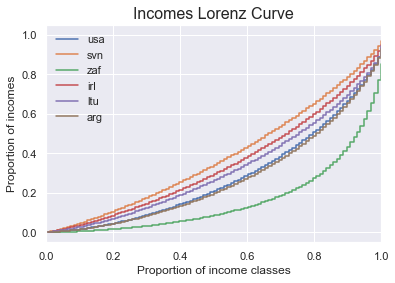

<Figure size 1440x720 with 0 Axes>

In [174]:
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post', label = 'usa')
# usa
plt.plot(xaxis,loren,drawstyle='steps-post', label = 'svn')
# svn
plt.plot(xaxis,lore,drawstyle='steps-post', label = 'zaf')
# zaf
plt.plot(xaxis,lor,drawstyle='steps-post', label = 'irl')
# irl
plt.plot(xaxis,lo,drawstyle='steps-post', label = 'ltu')
# ltu
plt.plot(xaxis,l,drawstyle='steps-post', label = 'arg')
# arg
plt.xlim(xmin=0.0, xmax=1)
plt.xlabel('Proportion of income classes', fontsize = 12)
plt.ylabel('Proportion of incomes', fontsize = 12)
plt.title('Incomes Lorenz Curve', fontsize = 16)
plt.legend(loc = 'best', frameon = False)
plt.figure(figsize=(20,10))

plt.savefig('Lorenz_Curves_incomes.jpg')
plt.show()